<a href="https://colab.research.google.com/github/bugrakaann/RoadFishEyeDetection/blob/main/RoadFishEyeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!wget "https://scidm.nchc.org.tw/en/dataset/fisheye8k/resource/f6e7500d-1d6d-48ea-9d38-c4001a17170e/nchcproxy" -O dataset.zip


Mounted at /content/drive
--2025-04-29 09:35:17--  https://scidm.nchc.org.tw/en/dataset/fisheye8k/resource/f6e7500d-1d6d-48ea-9d38-c4001a17170e/nchcproxy
Resolving scidm.nchc.org.tw (scidm.nchc.org.tw)... 140.110.30.66
Connecting to scidm.nchc.org.tw (scidm.nchc.org.tw)|140.110.30.66|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cos.twcc.ai/fishlentrafficdataset/Fisheye8K_all_including_train%26test_update_2024Jan.zip [following]
--2025-04-29 09:36:35--  https://cos.twcc.ai/fishlentrafficdataset/Fisheye8K_all_including_train%26test_update_2024Jan.zip
Resolving cos.twcc.ai (cos.twcc.ai)... 203.145.219.21
Connecting to cos.twcc.ai (cos.twcc.ai)|203.145.219.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13362946197 (12G) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  12.44G  25.1MB/s    in 20m 42s 

2025-04-29 09:57:19 (10.3 MB/s) - ‘dataset.zip’ saved [1336294619

In [ ]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.3 MB/s eta 0:00:00


In [ ]:
!unzip -q dataset.zip -d dataset

In [ ]:
from ultralytics import YOLO
import torch

print('GPU Kullanılabilir:', torch.cuda.is_available())


# 6. Dataset YAML Dosyasını Oluştur
fish_eye_yaml = """
path: /content/dataset/Fisheye8K_all_including_train&test
train: train/images
val: test/images

names:
  0: Bus
  1: Bike
  2: Car
  3: Pedestrian
  4: Truck
"""

with open('fish_eye.yaml', 'w') as f:
    f.write(fish_eye_yaml)

model = YOLO('yolov8m.pt')



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
GPU Kullanılabilir: True


100%|██████████| 49.7M/49.7M [00:00<00:00, 111MB/s] 


In [ ]:
# Eğitim Başlat (Fine-Tuning)
model.train(
    data='fish_eye.yaml',
    imgsz=1280,
    epochs=100,
    batch=4,
    device=0,  # GPU kullan
    patience=10,
    save_period=1,  # Her 1 epoch'ta bir kaydet
    project='/content/drive/MyDrive/yolo_training'
)

Ultralytics 8.3.120 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=fish_eye.yaml, epochs=100, time=None, patience=10, batch=4, imgsz=1280, save=True, save_period=1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/yolo_training, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 136.1±23.1 MB/s, size: 1543.2 KB)


train: Scanning /content/dataset/Fisheye8K_all_including_train&test/train/labels... 5288 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5288/5288 [00:50<00:00, 104.94it/s]

train: /content/dataset/Fisheye8K_all_including_train&test/train/images/camera15_A_52.png: 1 duplicate labels removed
train: /content/dataset/Fisheye8K_all_including_train&test/train/images/camera17_A_52.png: 1 duplicate labels removed
train: /content/dataset/Fisheye8K_all_including_train&test/train/images/camera17_A_57.png: 1 duplicate labels removed
train: /content/dataset/Fisheye8K_all_including_train&test/train/images/camera17_A_67.png: 1 duplicate labels removed
train: /content/dataset/Fisheye8K_all_including_train&test/train/images/camera17_A_70.png: 1 duplicate labels removed
train: /content/dataset/Fisheye8K_all_including_train&test/train/images/camera17_A_74.png: 1 duplicate labels removed
train: /content/dataset/Fisheye8K_all_including_train&test/train/images/camera17_A_84.png: 1 duplicate labels removed
train: /content/dataset/Fisheye8K_all_including_train&test/train/images/camera17_A_85.png: 1 duplicate labels removed
train: New cache created: /content/dataset/Fisheye8K_all

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 133.9±83.9 MB/s, size: 1071.4 KB)


val: Scanning /content/dataset/Fisheye8K_all_including_train&test/test/labels... 2712 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2712/2712 [00:19<00:00, 138.72it/s]


val: New cache created: /content/dataset/Fisheye8K_all_including_train&test/test/labels.cache
Plotting labels to /content/drive/MyDrive/yolo_training/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_training/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.16G      1.436      1.144      1.177         95       1280: 100%|██████████| 1322/1322 [12:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:35<00:00,  2.17it/s]


                   all       2712      45145      0.557      0.412      0.429      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.25G      1.339     0.8204      1.136         69       1280: 100%|██████████| 1322/1322 [12:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:32<00:00,  2.23it/s]


                   all       2712      45145      0.625      0.398      0.453       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.07G      1.313     0.7734      1.125        123       1280: 100%|██████████| 1322/1322 [11:58<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:31<00:00,  2.24it/s]


                   all       2712      45145      0.575      0.447      0.478      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.28G      1.269     0.7182      1.102         76       1280: 100%|██████████| 1322/1322 [11:57<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:30<00:00,  2.26it/s]


                   all       2712      45145      0.596      0.408      0.477      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.23G      1.242     0.6783      1.092        232       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:32<00:00,  2.23it/s]


                   all       2712      45145      0.614      0.513      0.528      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.85G      1.218     0.6558      1.082        104       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:27<00:00,  2.29it/s]


                   all       2712      45145      0.488      0.442      0.446      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.82G      1.198     0.6309      1.074        224       1280: 100%|██████████| 1322/1322 [11:54<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:29<00:00,  2.27it/s]


                   all       2712      45145      0.643      0.487      0.529      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.75G      1.175     0.6119      1.068         76       1280: 100%|██████████| 1322/1322 [11:54<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:28<00:00,  2.28it/s]


                   all       2712      45145      0.603      0.479       0.53      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.28G      1.164     0.5969      1.061         87       1280: 100%|██████████| 1322/1322 [11:54<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:29<00:00,  2.27it/s]


                   all       2712      45145      0.641      0.455       0.52      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.07G      1.151     0.5876      1.057        227       1280: 100%|██████████| 1322/1322 [11:56<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:33<00:00,  2.21it/s]


                   all       2712      45145      0.618      0.426      0.479       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.11G      1.142     0.5774      1.051        141       1280: 100%|██████████| 1322/1322 [11:56<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:32<00:00,  2.22it/s]


                   all       2712      45145      0.634      0.454      0.517      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.54G      1.131     0.5697      1.047         91       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:30<00:00,  2.25it/s]


                   all       2712      45145      0.687      0.458      0.534      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.18G      1.118     0.5578       1.04        151       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:31<00:00,  2.23it/s]


                   all       2712      45145      0.645      0.498      0.543       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       7.5G      1.109     0.5487      1.035         76       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:34<00:00,  2.19it/s]


                   all       2712      45145      0.662      0.438      0.516      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.28G      1.097     0.5363      1.035        147       1280: 100%|██████████| 1322/1322 [11:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:35<00:00,  2.18it/s]


                   all       2712      45145      0.709      0.404      0.504      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.64G       1.09     0.5331       1.03         46       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:33<00:00,  2.20it/s]


                   all       2712      45145      0.534      0.517      0.531      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.37G      1.081      0.526      1.028        142       1280: 100%|██████████| 1322/1322 [11:56<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:32<00:00,  2.22it/s]


                   all       2712      45145      0.638      0.521      0.568      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.04G      1.075     0.5198      1.025        120       1280: 100%|██████████| 1322/1322 [11:56<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:32<00:00,  2.22it/s]


                   all       2712      45145      0.729      0.455      0.542      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.92G      1.072      0.519      1.026        207       1280: 100%|██████████| 1322/1322 [11:56<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:29<00:00,  2.26it/s]


                   all       2712      45145      0.617      0.463        0.5      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.73G      1.064     0.5125      1.016         96       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:33<00:00,  2.21it/s]


                   all       2712      45145        0.7      0.468      0.558      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.44G      1.057     0.5054      1.017         81       1280: 100%|██████████| 1322/1322 [11:56<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:33<00:00,  2.21it/s]


                   all       2712      45145      0.681      0.437      0.511      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.32G      1.052     0.5013      1.016         98       1280: 100%|██████████| 1322/1322 [11:57<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:30<00:00,  2.25it/s]


                   all       2712      45145      0.659      0.483      0.534      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       7.2G      1.043     0.4959       1.01         77       1280: 100%|██████████| 1322/1322 [11:56<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:32<00:00,  2.22it/s]


                   all       2712      45145      0.677      0.467       0.54      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.22G      1.045     0.4933      1.011         77       1280: 100%|██████████| 1322/1322 [11:54<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:29<00:00,  2.26it/s]


                   all       2712      45145      0.621      0.456      0.517      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.01G      1.035     0.4876      1.009         64       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:34<00:00,  2.20it/s]


                   all       2712      45145      0.697      0.492      0.573      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.88G      1.029     0.4842      1.005         79       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:29<00:00,  2.27it/s]


                   all       2712      45145      0.669      0.494      0.579      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.26G      1.026     0.4832          1         83       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:28<00:00,  2.28it/s]


                   all       2712      45145      0.707       0.45      0.527      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.74G      1.023      0.479      1.004        121       1280: 100%|██████████| 1322/1322 [11:54<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:29<00:00,  2.27it/s]


                   all       2712      45145      0.656      0.478      0.542      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.42G       1.02     0.4761      1.005        116       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:28<00:00,  2.28it/s]


                   all       2712      45145      0.624      0.474      0.536      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.62G       1.01      0.469          1        181       1280: 100%|██████████| 1322/1322 [11:54<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:29<00:00,  2.26it/s]


                   all       2712      45145      0.782      0.421      0.556      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.13G      1.014     0.4707      1.001        153       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:29<00:00,  2.27it/s]


                   all       2712      45145      0.706      0.477      0.561      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       7.1G      1.003     0.4671     0.9932        189       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:28<00:00,  2.28it/s]


                   all       2712      45145      0.741      0.505      0.597      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.89G          1      0.465     0.9936        223       1280: 100%|██████████| 1322/1322 [11:54<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:30<00:00,  2.25it/s]


                   all       2712      45145      0.726      0.454      0.532      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.82G     0.9922     0.4603     0.9904        136       1280: 100%|██████████| 1322/1322 [11:57<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:31<00:00,  2.24it/s]


                   all       2712      45145      0.695      0.472      0.529      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.19G     0.9915     0.4579     0.9912         73       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:30<00:00,  2.25it/s]


                   all       2712      45145      0.661      0.474       0.55      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.46G     0.9798      0.454     0.9876         55       1280: 100%|██████████| 1322/1322 [11:56<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:29<00:00,  2.26it/s]


                   all       2712      45145      0.627       0.46      0.524      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.06G     0.9822     0.4533     0.9897        114       1280: 100%|██████████| 1322/1322 [11:56<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:34<00:00,  2.19it/s]


                   all       2712      45145      0.648      0.493      0.549      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.34G      0.983     0.4513     0.9884         55       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:32<00:00,  2.23it/s]


                   all       2712      45145      0.707      0.456      0.545      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.12G     0.9797     0.4498     0.9883        109       1280: 100%|██████████| 1322/1322 [11:57<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:32<00:00,  2.22it/s]


                   all       2712      45145      0.601      0.505      0.531      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       7.6G      0.976     0.4483     0.9872        193       1280: 100%|██████████| 1322/1322 [11:57<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:33<00:00,  2.21it/s]


                   all       2712      45145      0.613      0.455      0.532      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.38G     0.9665     0.4415     0.9791         54       1280: 100%|██████████| 1322/1322 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:32<00:00,  2.22it/s]


                   all       2712      45145       0.69      0.474      0.541      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         7G     0.9615     0.4392     0.9797         64       1280: 100%|██████████| 1322/1322 [11:57<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:33<00:00,  2.21it/s]


                   all       2712      45145      0.755      0.436      0.535      0.325
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

42 epochs completed in 10.170 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_training/train2/weights/last.pt, 52.2MB
Optimizer stripped from /content/drive/MyDrive/yolo_training/train2/weights/best.pt, 52.2MB

Validating /content/drive/MyDrive/yolo_training/train2/weights/best.pt...
Ultralytics 8.3.120 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 339/339 [02:35<00:00,  2.18it/s]


                   all       2712      45145      0.742      0.504      0.597      0.356
                   Bus        695        930      0.735      0.694      0.732      0.487
                  Bike       2696      26270      0.813      0.436      0.607      0.295
                   Car       2606      14113      0.831      0.673      0.775      0.467
            Pedestrian       1154       2633      0.607      0.295      0.336      0.154
                 Truck       1125       1199      0.725      0.423      0.534      0.377
Speed: 0.9ms preprocess, 32.6ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_training/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f094eaa9dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        


image 1/1 /content/dataset/Fisheye8K_all_including_train&test/test/images/camera1_A_27.png: 1120x1280 2 Buss, 10 Bikes, 10 Cars, 1 Truck, 87.9ms
Speed: 9.6ms preprocess, 87.9ms inference, 25.5ms postprocess per image at shape (1, 3, 1120, 1280)
Results saved to runs/detect/predict


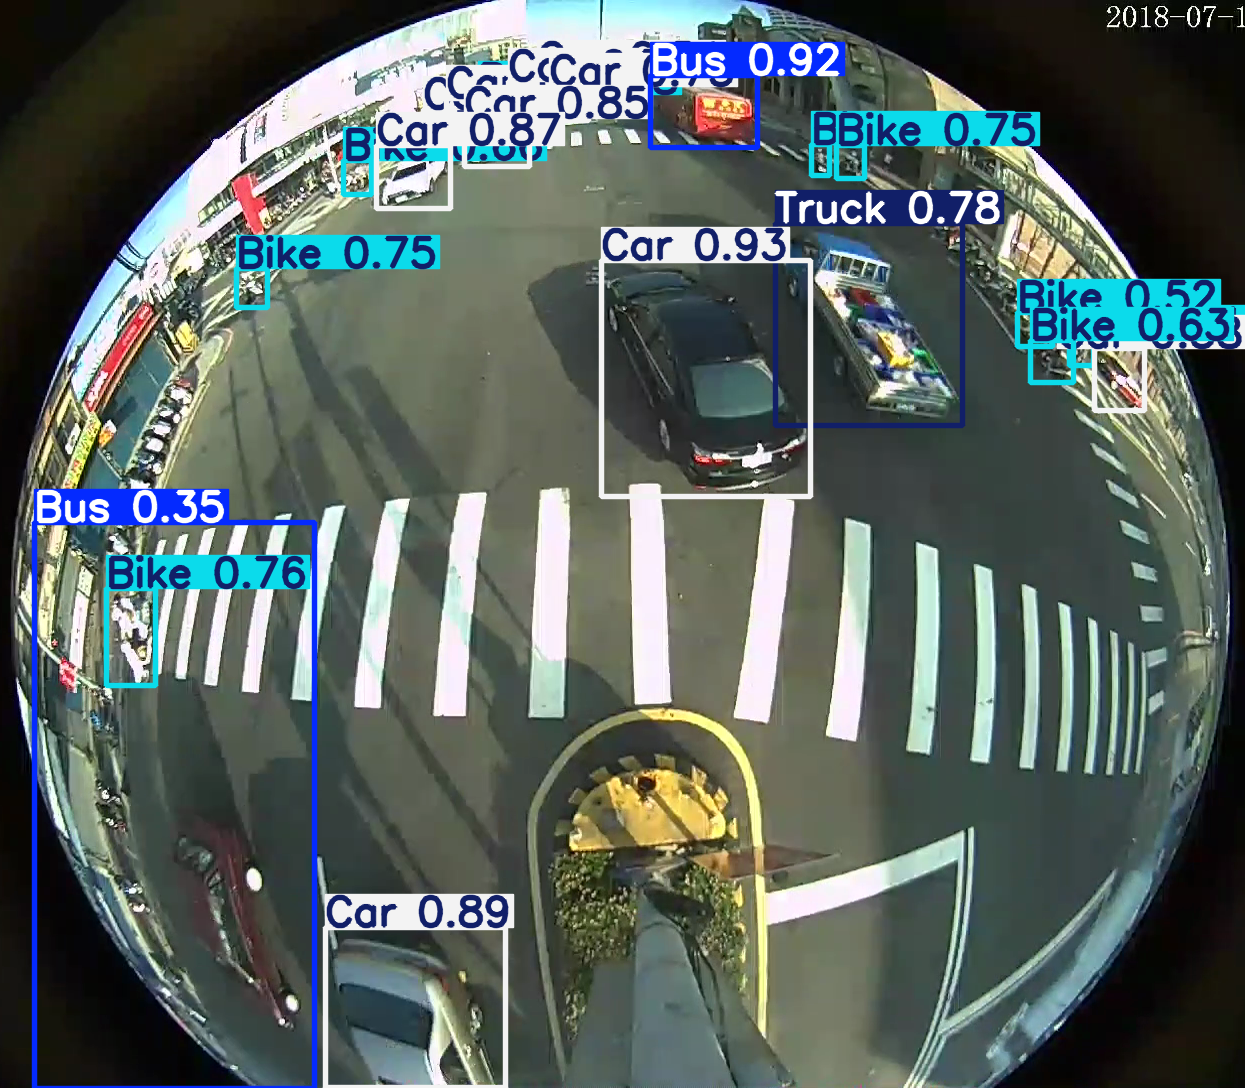

In [ ]:
from ultralytics import YOLO

# Eğitilen modelin yolunu kullanarak yükleme
model = YOLO('/content/drive/MyDrive/yolo_training/train2/weights/best.pt')  # veya last.pt

results = model('/content/dataset/Fisheye8K_all_including_train&test/test/images/camera1_A_27.png', save=True, conf=0.25)

# Sonuçları görselleştirme
results[0].show()
